In [1]:
###############################################################################
#                       Load Library                                          #
###############################################################################

#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone,ClassifierMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
import itertools
# Imbalanced data 
from imblearn.datasets import fetch_datasets
# to correctly set up the cross-validation
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)

set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
###############################################################################
#                        Read train data                                      #
###############################################################################

train = pd.read_csv('../input/cs-training.csv')
test = pd.read_csv('../input/cs-test.csv')
train.head(3)

CPU times: user 288 ms, sys: 87.2 ms, total: 376 ms
Wall time: 554 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# 1-Preprocessing

## Convert Dtypes :

In [3]:
###############################################################################
#                       Cast dtypes                                           #
###############################################################################

# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Reduce Memory

In [4]:
###############################################################################
#                        Reduce Memory                                        #
###############################################################################

# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


## X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

## Imput before Descritaziation : 

### IterativeImputer


In [7]:
%%time 
###############################################################################
#                        Impute Data                                          #
###############################################################################

param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
           # 'gpu_id':0, 
           # 'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
            # 'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

CPU times: user 434 µs, sys: 0 ns, total: 434 µs
Wall time: 440 µs


In [8]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 1h 13min 56s, sys: 6.12 s, total: 1h 14min 2s
Wall time: 19min 1s


In [9]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 1h 23min 21s, sys: 5.13 s, total: 1h 23min 26s
Wall time: 21min 24s


In [10]:
###############################################################################
#                        Add Bin Features                                     #
###############################################################################

# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

## Final X and y

In [11]:
###############################################################################
#                        Final X and Y                                    #
###############################################################################

# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [12]:
del train
del test 
del train_final
del test_final

In [13]:
###############################################################################
#                        Select Dtypes                                         #
###############################################################################

# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

### Num Features



In [14]:
###############################################################################
#                        Select Dtypes                                         #
###############################################################################

# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

# FE

In [15]:
###############################################################################
#                       Fe Class                                              #
###############################################################################

class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

1. Add bin data 

## Pipe : 


In [16]:
###############################################################################
#                       Final Selected Pipes                                          #
###############################################################################

# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

# Selected Models :

In [17]:
params_hgbc = {'l2_regularization': 2.940296779699346e-10, 
         'early_stopping': 'False',
         'learning_rate': 0.015318591316397998, 
         'max_iter': 1537, 
         'max_depth': 19, 
         'max_bins': 137, 
         'min_samples_leaf': 140,
         'max_leaf_nodes': 23}
model_hgbc = HistGradientBoostingClassifier(**params_hgbc)

 #Private Score 0.86875  Public Score 0.86245
pipe1_model_hgbc_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        #('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
        #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_hgbc)
    ]
)
pipe1_model_hgbc_woe_powertransformer2 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            # ('dim_red', SelectKBest(f_regression, k=20)),
            #('Sparseinteractions', SparseInteractions(degree=2)),
             #('PolynomialFeatures', PolynomialFeatures(degree=2)),
            #('PCAreducer', PCA(n_components=0.8)),
            ('classifier',model_hgbc)
        ]
    )
# Private Score 0.86861  Public Score 0.86236
pipe1_model_hgbc_woe_powertransformer2 
#pipe1_model_hgbc_woe_powertransformer


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(early_stopping='False',
                                                l2_regularization=2.940296779699346e-10,
                                                learning_rate=0.015318591316397998,
                                                max_bins=137, max_depth=19,
                                                max_iter=1537,
                                                max_leaf_nodes=23,
                                                min_samples_leaf=140))])

**2-CatBoost**

In [18]:
params_catboost = { "random_state": 42,
                    "loss_function":"Logloss",
                    "eval_metric":"AUC",
                    #"task_type" : "GPU",
                   'learning_rate': 0.03174251209279996,
                   'iterations': 1957,
                   'objective': 'CrossEntropy',
                   'colsample_bylevel': 0.05457006237382004,
                   'depth': 4,
                   'boosting_type': 'Ordered',
                   'bootstrap_type': 'MVS',
                   'verbose':False
                  }
model_catboost = CatBoostClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_catboost)
pipe1_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)
# Private Score 0.86903  Public Score 0.86217
#pipe1_model_catboost_woe_powertransformer

**-3 XGBR**

In [19]:
params_xgbr = { "verbosity": 0,
                "objective": "binary:logistic",
                "eval_metric": "auc",
                'random_state': 42,
                # regression
                #'objective':'reg:squarederror', 
                # 'eval_metric': 'mae',
                #early_stopping_rounds=100 ,
                'gpu_id':0, 
                'predictor':"gpu_predictor",
                # use exact for small dataset.
                #"tree_method": "exact",
                # big data :
                 'tree_method': 'gpu_hist',
                # defines booster, gblinear for linear functions.
               'booster': 'gbtree',
               'lambda': 0.05718879852112006,
               'alpha': 0.3744455966091751, 
               'subsample': 0.4600950043573827, 
               'colsample_bytree': 0.4826795171274075, 
               'learning_rate': 0.04028462871213848, 
               'n_estimators': 6258, 
               'max_depth': 3,
               'min_child_weight': 9,
               'eta': 1.0243140309668855e-07,
               'gamma': 0.0002882867942209271, 
               'grow_policy': 'lossguide'
              }
model_xgbr = XGBClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_xgbr)
pipe1_model_xgbr_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_xgbr)
    ]
)
#pipe1_model_xgbr_woe_powertransformer

**4-lgbm:**

In [20]:
params_lgbm =  {
               "objective": "binary",
                'random_state': 42,
                'metric': 'auc',
                "verbosity": -1,
                "boosting_type": "gbdt",
                "device": "gpu",
                #"early_stopping_rounds":100,
                'learning_rate': 0.005282912028625591, 
                'n_estimators': 1491,
                'lambda_l1': 2.5825901359648176e-05, 
                'lambda_l2': 4.490094872871969,
                'num_leaves': 76,
                'feature_fraction': 0.7099515479738928,
                'bagging_fraction': 0.8225459856082522,
                'bagging_freq': 3,
                'min_child_samples': 35
               }
model_lgbm = lgbm.LGBMClassifier(**params_lgbm,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm)
    ]
)
#pipe1_model_lgbm_woe_powertransformer

In [21]:
lgbm_param2={'learning_rate': 0.0018069834369607075,
                                 'max_depth': 8,
                                 #'max_features': 4,
                                 'min_samples_leaf': 47,
                                 #'min_samples_split': 389,
                                 'subsample': 0.8573598985000007,
                                 #'n_iter_no_change': 300,
                                 'n_estimators': 5000,
                                 'verbose': -1,
                                 'random_state': 42,
                                 'metric': 'auc',
                               # "device_type" : "gpu",
                                'boosting_type': 'gbdt',
                                #'tree_method': "gpu_hist"
                               }

model_lgbm2 = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm2)
    ]
)
#pipe1_model_lgbm_woe_powertransformer2

In [22]:
pipe1_GaussianNB_woe_powertransformer= Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',GaussianNB())
    ]
)


# Best Pipes : 


In [23]:
###############################################################################
#                        Best  Pipes                                          #
###############################################################################

pipe1_lgbm_woe_powertransformer93 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=93)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                             
                                               **lgbm_param2))
        ]
    )

pipe1_lgbm_woe_powertransformer = Pipeline(
                                steps=[
                                    ('preprocessor', preprocessor_woe_powertransformer),
                                    ('reducedim',  SelectPercentile( f_classif, percentile=98)),
                                    ('classifier',
                                     lgbm.LGBMClassifier( 
                                        #n_jobs=-1,
                                                                    
                                                                       **lgbm_param2))
                                ]
                                )
pipe1_lgbm_woe_powertransformer90 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=90)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                           
                                               **lgbm_param2))
        ]
    )
pipe1_lgbm_woe_powertransformer95 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=95)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                           
                                               **lgbm_param2))
        ]
    )
preprocessor_woe_powertransformer100 = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer, num_columns),
                   # ('categorical', categorical_transformer, cat_columns)
                ])
pipe_lgbm_woe_powertransformer100 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer100),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',
         lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                         
                                           **lgbm_param2))
    ]
    ) 
## Pipe_12
#Define vnum pipeline
numeric_transformer_12 = Pipeline(
                                steps=[
                                ('imputer', SimpleImputer(strategy='median'
                                                          ,add_indicator=True)),
                                #('general_features',FeaturesEngineer()),
                                ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                                # Create an SelectKBest object to select features with two best ANOVA F-Values
                                #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                                ('polynominal_features', PolynomialFeatures(degree=2)),
                                ('kmeans',MiniKmeansTransformerEncoder()),
                                #('reducedim',  SelectPercentile(f_classif,percentile=90))
                                ]
                                )

preprocessor_woe_powertransformer_12 = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer_12, num_columns),
                   # ('categorical', categorical_transformer, cat_columns)
                ])
pipe1_lgbm_woe_powertransformer_12 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer_12),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               
                                               **lgbm_param2))
        ]
    )
# Pipe 2: 
# Cat pipeline
categorical_transformer2 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer2 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer2 = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer2, num_columns),
                ('categorical', categorical_transformer2, cat_columns)
            ])
pipe2_lgbm_woe_powertransformer = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer2),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                              
                                               **lgbm_param2))
        ]
    )
pipe2_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer2),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)

In [24]:
###############################################################################
#                        Best pipes                                           #
###############################################################################

# Pipe 1
# Private Score 0.86914 Public Score 0.86245
pipe1_lgbm_woe_powertransformer95 
# Private Score 0.86911 Public Score 0.86230
pipe_lgbm_woe_powertransformer100  
# Private Score 0.86903  Public Score 0.86217
pipe1_model_catboost_woe_powertransformer
#Private Score 0.86875  Public Score 0.86245
pipe1_model_hgbc_woe_powertransformer
## Pipe_12
#  Private Score 0.86895  Public Score 0.86231
pipe1_lgbm_woe_powertransformer_12
# Private Score 0.86898 Public Score 0.86230
pipe2_lgbm_woe_powertransformer
# Private Score 0.86903  Public Score 0.86215
pipe2_model_catboost_woe_powertransformer  
best_pipes=[pipe1_lgbm_woe_powertransformer95,
            pipe1_lgbm_woe_powertransformer_12,
            pipe1_model_catboost_woe_powertransformer,
            #pipe1_model_hgbc_woe_powertransformer,
            pipe2_lgbm_woe_powertransformer,
            pipe2_model_catboost_woe_powertransformer
           ]

In [25]:
###############################################################################
#                        Complete mlextend mdoels                             #
###############################################################################

##### from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingCVClassifier

mlxtend_sclf1 = StackingCVClassifier(classifiers=best_pipes,use_probas=False,
                            meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)

mlxtend_sclf2 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                            meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)

mlxtend_sclf3 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf32 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=LogisticRegression(),cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf4_pipe = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf3

StackingCVClassifier(classifiers=[Pipeline(steps=[('preprocessor',
                                                   ColumnTransformer(transformers=[('numerical',
                                                                                    Pipeline(steps=[('imputer',
                                                                                                     SimpleImputer(add_indicator=True,
                                                                                                                   strategy='median')),
                                                                                                    ('scaler',
                                                                                                     PowerTransformer()),
                                                                                                    ('kmeans',
                                                                                                     MiniKmeansTransformerEncoder()),
                                                                                                    ('polynominal_features',
                                                                                                     PolynomialFeatures())]),
                                                                                    Index(['RevolvingUtilizationOfUnsecured...
                                                   learning_rate=0.04028462871213848,
                                                   max_delta_step=None,
                                                   max_depth=3,
                                                   min_child_weight=9,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   n_estimators=6258,
                                                   n_jobs=None,
                                                   num_parallel_tree=None,
                                                   predictor='gpu_predictor',
                                                   random_state=42,
                                                   reg_alpha=None,
                                                   reg_lambda=None,
                                                   scale_pos_weight=None,
                                                   subsample=0.4600950043573827, ...),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True)

In [26]:
#X=X.iloc[0:10000,:].copy()
#y=y.iloc[0:10000].copy()

In [27]:
###############################################################################
#                        Define Models                                          #
###############################################################################

params1 = {"random_state": 42,
         "solver": 'newton-cg',
         "max_iter": 10,
        #"meta_classifier__C": np.logspace(-4, 4, 10),
        #"meta_classifier__C": np.logspace(-4, 4, 10),
         "C": .001,
         #"meta_classifier__penalty":  ['l2', 'l1']
         "penalty":  'l2'
         }
params2={'C': 0.009,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear'}
lr1=LogisticRegression(**params1)
lr2=LogisticRegression(**params2)
# Initializing the StackingCV classifier
# Create list to store classifiers
classifiers = {"pipe1":pipe1_lgbm_woe_powertransformer95,
            #"pipe2":pipe_lgbm_woe_powertransformer100,
            "pipe2": pipe1_lgbm_woe_powertransformer_12,
           # "pipe3":pipe1_model_catboost_woe_powertransformer,
           # "pipe5":pipe1_model_hgbc_woe_powertransformer,
            "pipe3":pipe2_lgbm_woe_powertransformer,
            "pipe4":pipe2_model_catboost_woe_powertransformer
           }
classifier_combo1=[value for value in classifiers.values()]
#classifier_combo1

In [28]:
###############################################################################
#                       Stacking Models                                       #
###############################################################################

sclf1 = StackingCVClassifier(classifiers = classifier_combo1,
                                shuffle = False,
                                use_probas = True,
                                stratify=True,
                                cv = 10,
                                meta_classifier =lr1 ,
                                n_jobs = -1)
sclf2 = StackingCVClassifier(classifiers = classifier_combo1,
                                shuffle = False,
                                use_probas = True,
                                stratify=True,
                                cv = 10,
                                meta_classifier =lr2 ,
                                n_jobs = -1)

# Final Pipe : 

In [29]:
###############################################################################
#                        Final Pipe                                          #
###############################################################################

#Define vnum pipeline
numeric_transformer_final = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('reducedim',  SelectPercentile(f_classif,percentile=95)),
                            #('scaler_minmax',MinMaxScaler())
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer_final = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_final, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
               
            ])
preprocessor_woe_powertransformer_final

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', PowerTransformer()),
                                                 ('kmeans',
                                                  MiniKmeansTransformerEncoder()),
                                                 ('polynominal_features',
                                                  PolynomialFeatures()),
                                                 ('reducedim',
                                                  SelectPercentile(percentile=95))]),
                                 Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])

In [30]:
preprocessor_woe_powertransformer_final

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', PowerTransformer()),
                                                 ('kmeans',
                                                  MiniKmeansTransformerEncoder()),
                                                 ('polynominal_features',
                                                  PolynomialFeatures()),
                                                 ('reducedim',
                                                  SelectPercentile(percentile=95))]),
                                 Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])

# UnderSample : 
    all data: 

    model_lgbm2 roc_auc: 0.8625688276997037 +/- 0.0035080236891726173
   
    
    enn

    model_lgbm2 roc_auc: 0.8630909788287942 +/- 0.0038026055124852757
    
    oss

    model_lgbm2 roc_auc: 0.8627229021333344 +/- 0.003784828443950451
    
    tomek

    model_lgbm2 roc_auc: 0.8627041498279308 +/- 0.003584230592089494
    
    ncr

    model_lgbm2 roc_auc: 0.8621691036387884 +/- 0.003973914786246707
    
    renn

    model_lgbm2 roc_auc: 0.8621382365638033 +/- 0.003615991141402151
    
    allknn

    model_lgbm2 roc_auc: 0.8621110226669315 +/- 0.0040351051926343535
    


    random

    model_lgbm2 roc_auc: 0.858181429188133 +/- 0.004612587761779285


    iht

    model_lgbm2 roc_auc: 0.7991996119828295 +/- 0.010744213905743065
    
    
    
 # OverSample   
 

    model_lgbm2 roc_auc: 0.8627374534105787 +/- 0.002681755319299279

    random
    model_lgbm2 roc_auc: 0.8627941543070008 +/- 0.0031255721275641867
    
    svm
    model_lgbm2 roc_auc: 0.8581355858562725 +/- 0.0032732419156711657

    border2
    model_lgbm2 roc_auc: 0.8580089216588368 +/- 0.0031155380536501227

    border1
    model_lgbm2 roc_auc: 0.8575183488597625 +/- 0.0033858176289283228

    smote
    model_lgbm2 roc_auc: 0.8572738779017686 +/- 0.003559254566375173

    adasyn
    model_lgbm2 roc_auc: 0.8562332256549373 +/- 0.003528177645756943








In [31]:
%%time 
###############################################################################
#                         Undersample                      #
###############################################################################

undersampler_enn = make_pipeline(
            #MinMaxScaler(),
            EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),
           # model_lgbm2,
    #lr1
       )
undersampler_enn1 = make_pipeline(
            #MinMaxScaler(),
            EditedNearestNeighbours(
        sampling_strategy='majority',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),
           # model_lgbm2,
    #lr1
)
undersampler_oss = make_pipeline(
          #  MinMaxScaler(),
          OneSidedSelection(
        sampling_strategy='auto',
        random_state=42,
        n_neighbors=1,
        n_jobs=-1),
           # model_lgbm2,
    #lr1
       )
undersampler_tomek = make_pipeline(
          #  MinMaxScaler(),
          TomekLinks(
        sampling_strategy='auto',
        n_jobs=-1),
           # model_lgbm2,
    #lr1
       )

###############################################################################
#                         Oversample                                          #
###############################################################################

oversample_random= RandomOverSampler(
        sampling_strategy='auto',
        random_state=42)

oversample_smote= SMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=42,  # for reproducibility
        k_neighbors=5,
        n_jobs=4)

oversample_adasyn= ADASYN(
        sampling_strategy='auto',  # samples only the minority class
        random_state=42,  # for reproducibility
        n_neighbors=5,
        n_jobs=4)

oversample_border1= BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=42,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4)

oversample_border2= BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=42,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=4)

oversample_svm= SVMSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=42,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=svm.SVC(kernel='linear'))
###############################################################################
#                         Cost-Sensitive                                         #
###############################################################################
# Not balanced lgbm2 
# Balanced 
model_lgbm_balanced = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                            class_weight='balanced' # weights / cost
                             )
# Manual wieght : 
model_lgbm_manual = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                           class_weight={0:1, 1:10}) # weights / cost
# Sample weights : 
scale_pos_weight1 = 139974/(10026)
scale_pos_weight2_smooth = np.sqrt(139974/(10026))                           
###############################################################################
#                         Preprocess                                          #
###############################################################################
preprocessor_woe_powertransformer_final.fit(X,y)
x_pre = preprocessor_woe_powertransformer_final.transform(X)
x_test_final_pre = preprocessor_woe_powertransformer_final.transform(X_test_final)
#x_rus, y_rus = undersampler_enn.fit_resample(x_pre, y)
#x_rus, y_rus = undersampler_enn1.fit_resample(x_pre, y)
#x_rus, y_rus = undersampler_oss.fit_resample(x_pre, y)
#x_rus, y_rus = undersampler_tomek.fit_resample(x_pre, y)
    
# x_rus, y_rus = oversample_svm.fit_resample(x_pre, y)
#x_rus, y_rus = oversample_border2.fit_resample(x_pre, y)
#x_rus, y_rus = oversample_border1.fit_resample(x_pre, y)# not done wihthoutminmax
#x_rus, y_rus = oversample_adasyn.fit_resample(x_pre, y)
#x_rus, y_rus = oversample_smote.fit_resample(x_pre, y)
x_rus, y_rus = oversample_random.fit_resample(x_pre, y)
###############################################################################
#                         Preprocess    Result                                #
###############################################################################
print('original dataset shape:', y.shape)
#print('Resample dataset shape', y_rus.shape)
print('original dataset shape:', X.shape)
print('Train dataset shape', x_pre.shape)
print('Test dataset shape', x_test_final_pre.shape)

#del x_final
#del x_test_final

original dataset shape: (150000,)
original dataset shape: (150000, 20)
Train dataset shape (150000, 74)
Test dataset shape (101503, 74)
CPU times: user 5.16 s, sys: 54.9 ms, total: 5.22 s
Wall time: 4.22 s


In [32]:
##############################################################################
#                         Preprocess                                          #
###############################################################################

x_rus, y_rus = oversample_random.fit_resample(x_pre, y)
###############################################################################
#                         Preprocess    Result                                #
###############################################################################
print('original dataset shape:', y.shape)
#print('Resample dataset shape', y_rus.shape)
print('original dataset shape:', X.shape)
print('Train dataset shape', x_pre.shape)
print('Test dataset shape', x_test_final_pre.shape)

#del x_final
#del x_test_final

original dataset shape: (150000,)
original dataset shape: (150000, 20)
Train dataset shape (150000, 74)
Test dataset shape (101503, 74)


In [33]:
###############################################################################
#                         Shape before sampling                               #
###############################################################################

unique, counts = np.unique(y, return_counts=True)
print( np.asarray((unique, counts)).T)

[[     0 139974]
 [     1  10026]]


In [34]:
###############################################################################
#                         Shape after  sampling                               #
###############################################################################

unique, counts = np.unique(y_rus, return_counts=True)
print( np.asarray((unique, counts)).T)

[[     0 139974]
 [     1 139974]]


<AxesSubplot:title={'center':'Count (target)'}>

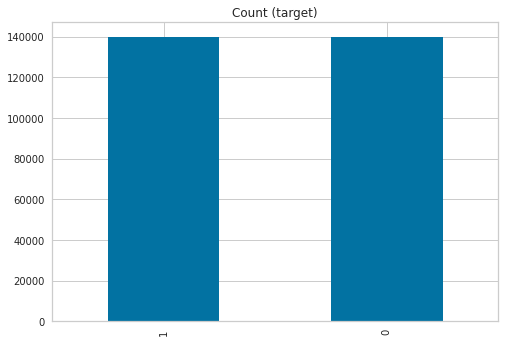

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(x_pre, y)
df = pd.DataFrame(X_sm)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)')

In [36]:
%%time 
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


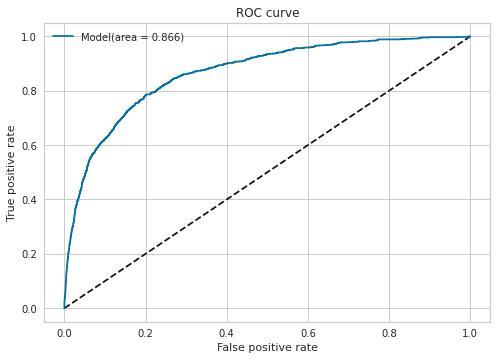

Confusion_matrix:
 [[13873   124]
 [  816   187]]
Fold 0 | AUC: 0.866285974540478
Fold 0 | F1: 0.28462709284627097
Fold 0 | Avergae_precesion: 0.40153176937358215
Fold 0 | recall: 0.1864406779661017
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13997
           1       0.60      0.19      0.28      1003

    accuracy                           0.94     15000
   macro avg       0.77      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


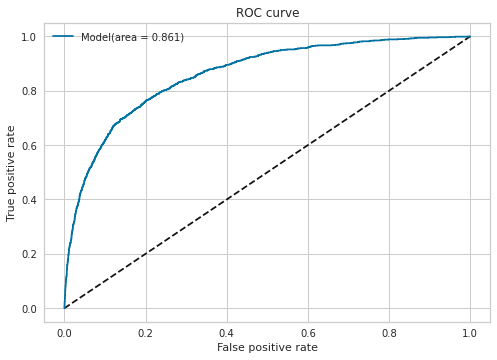

Confusion_matrix:
 [[13858   139]
 [  808   195]]
Fold 1 | AUC: 0.8609375132443635
Fold 1 | F1: 0.2916978309648467
Fold 1 | Avergae_precesion: 0.38271210643004555
Fold 1 | recall: 0.19441674975074777
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13997
           1       0.58      0.19      0.29      1003

    accuracy                           0.94     15000
   macro avg       0.76      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


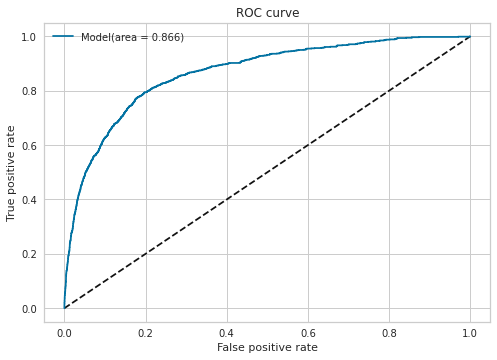

Confusion_matrix:
 [[13846   151]
 [  806   197]]
Fold 2 | AUC: 0.8660398030029366
Fold 2 | F1: 0.2916358253145818
Fold 2 | Avergae_precesion: 0.40260659529955894
Fold 2 | recall: 0.19641076769690927
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13997
           1       0.57      0.20      0.29      1003

    accuracy                           0.94     15000
   macro avg       0.76      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


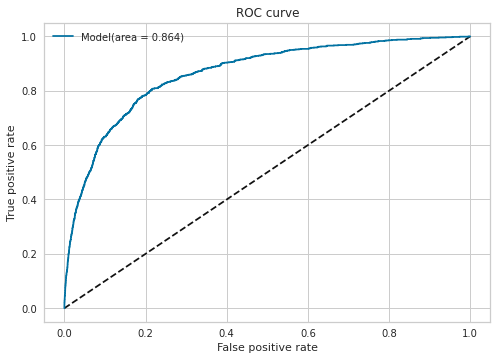

Confusion_matrix:
 [[13854   143]
 [  804   199]]
Fold 3 | AUC: 0.863946917552693
Fold 3 | F1: 0.295910780669145
Fold 3 | Avergae_precesion: 0.3967393184748874
Fold 3 | recall: 0.1984047856430708
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.58      0.20      0.30      1003

    accuracy                           0.94     15000
   macro avg       0.76      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


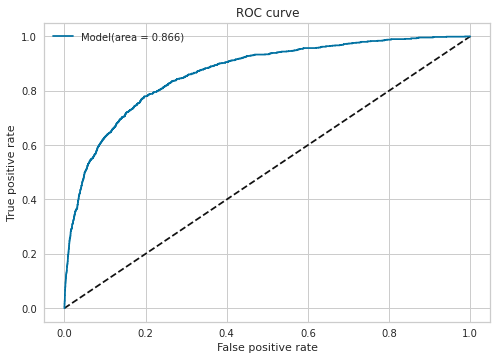

Confusion_matrix:
 [[13858   139]
 [  800   203]]
Fold 4 | AUC: 0.8657162398636769
Fold 4 | F1: 0.30185873605947955
Fold 4 | Avergae_precesion: 0.4015988489452065
Fold 4 | recall: 0.2023928215353938
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.59      0.20      0.30      1003

    accuracy                           0.94     15000
   macro avg       0.77      0.60      0.63     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


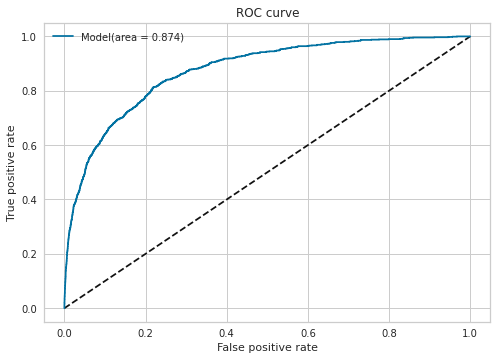

Confusion_matrix:
 [[13904    93]
 [  802   201]]
Fold 5 | AUC: 0.874196194014228
Fold 5 | F1: 0.30994602929838083
Fold 5 | Avergae_precesion: 0.44035609669675335
Fold 5 | recall: 0.20039880358923232
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13997
           1       0.68      0.20      0.31      1003

    accuracy                           0.94     15000
   macro avg       0.81      0.60      0.64     15000
weighted avg       0.93      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


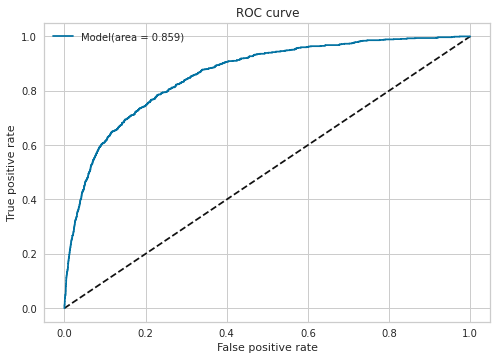

Confusion_matrix:
 [[13853   145]
 [  825   177]]
Fold 6 | AUC: 0.8589874116604624
Fold 6 | F1: 0.2673716012084592
Fold 6 | Avergae_precesion: 0.36463997205677456
Fold 6 | recall: 0.17664670658682635
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13998
           1       0.55      0.18      0.27      1002

    accuracy                           0.94     15000
   macro avg       0.75      0.58      0.62     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


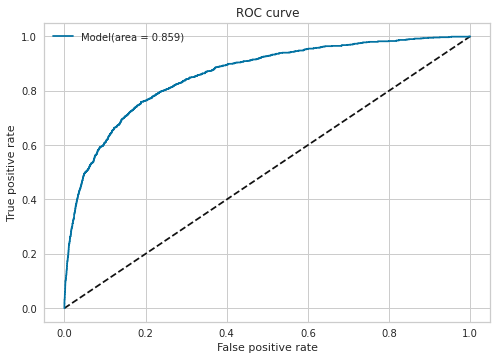

Confusion_matrix:
 [[13865   133]
 [  805   197]]
Fold 7 | AUC: 0.8590422740745114
Fold 7 | F1: 0.29579579579579585
Fold 7 | Avergae_precesion: 0.406825545484374
Fold 7 | recall: 0.1966067864271457
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13998
           1       0.60      0.20      0.30      1002

    accuracy                           0.94     15000
   macro avg       0.77      0.59      0.63     15000
weighted avg       0.92      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


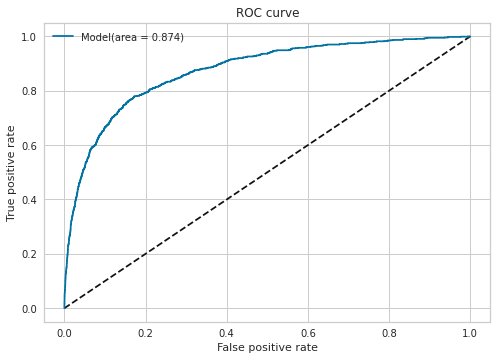

Confusion_matrix:
 [[13892   106]
 [  808   194]]
Fold 8 | AUC: 0.8739358687967685
Fold 8 | F1: 0.2980030721966206
Fold 8 | Avergae_precesion: 0.44231066779313616
Fold 8 | recall: 0.1936127744510978
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     13998
           1       0.65      0.19      0.30      1002

    accuracy                           0.94     15000
   macro avg       0.80      0.59      0.63     15000
weighted avg       0.93      0.94      0.92     15000

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


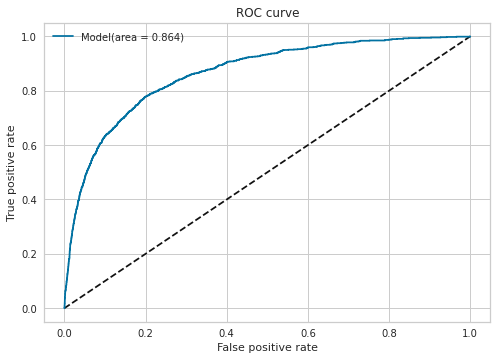

Confusion_matrix:
 [[13849   149]
 [  834   168]]
Fold 9 | AUC: 0.8638826789912103
Fold 9 | F1: 0.2547384382107657
Fold 9 | Avergae_precesion: 0.3724137507426916
Fold 9 | recall: 0.16766467065868262
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     13998
           1       0.53      0.17      0.25      1002

    accuracy                           0.93     15000
   macro avg       0.74      0.58      0.61     15000
weighted avg       0.92      0.93      0.92     15000

--------------------------------------------------------------------------------

Overall mean AUC score : 0.8652970875741328

Overall mean F1 score : 0.2891585202564346

Overall mean average precision score : 0.401173467129701

Overall mean recall score : 0.1912995544305208
CPU times: user 1h 47min 37s, sys: 16.9 s, total: 1h 47min 54s
Wall time: 27min 54s


In [37]:
%%time 
###############################################################################
#                         CV                                                 #
###############################################################################

# evaluate each strategy on the dataset
results = list()
# Setting a 10-fold stratified cross-validation (note: shuffle=True)
SEED = 42
FOLDS = 10
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# CV interations
# Create arrays for the features and the response variable
roc_auc = list()
average_precision = list()
#X1=X.iloc[0:2000,:].copy()
#y1=y[0:2000].copy()
oof = np.empty((X.shape[0],))
#oof = np.empty((x_rus.shape[0],))
#oof_bin = np.empty((X.shape[0],))
predictions=[]
mean_auc = 0
mean_ap=0
F1 = list()
Recall=list()
best_iteration = list()
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):    
    X_train, y_train =X.iloc[list(train_idx),:], y[list(train_idx)]
    X_test, y_test = X.iloc[list(test_idx),:],y[list(test_idx)]
    pipe1_model_lgbm_woe_powertransformer2.fit(X_train,y_train,
                                                  #classifier__verbose=False
                                                  #,verbose=False
              #sample_weight=np.where(y_train==1,1,4)
              #sample_weight=np.where(y_train==1,4,1)
              #sample_weight=np.where(y_train==1,14,1)      
                                                 )
    preds = pipe1_model_lgbm_woe_powertransformer2.predict_proba(X_test)[:,1]
    oof[test_idx] = preds
    auc_score= roc_auc_score(y_true=y_test, y_score=preds)
    roc_auc.append(auc_score)
    ap=average_precision_score(y_true=y_test, y_score=preds)
    plot_roc(y_test,preds)
    mean_auc += auc_score / FOLDS
    mean_ap+=ap/FOLDS
    predictions.append(pipe1_model_lgbm_woe_powertransformer2.predict_proba(X_test_final)[:,1]) 
    y_predicted =pipe1_model_lgbm_woe_powertransformer2.predict(X_test)
    recall = recall_score(y_test, y_predicted)
    f1= f1_score(y_test, y_predicted)
    print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))
    print(f"Fold {fold} | AUC: {auc_score}")
    print(f"Fold {fold} | F1: {f1}")
    print(f"Fold {fold} | Avergae_precesion: {ap}")
    print(f"Fold {fold} | recall: {recall}")
    print('Classification report:\n',classification_report(y_test,y_predicted))
    roc_auc.append(auc_score)
    F1.append(f1)
    Recall.append(recall)
    #Mean of the predictions
print('-' * 80)  
print(f"\nOverall mean AUC score : {mean_auc}")
print(f"\nOverall mean F1 score : {np.mean(F1)}")
print(f"\nOverall mean average precision score : {mean_ap}")
print(f"\nOverall mean recall score : {np.mean(Recall)}")

# Explanation : 

In [38]:
'''
Use shap to build an a explainer.
:parameter
    :param model: model instance (after fitting)
    :param X_names: list
    :param X_instance: array of size n x 1 (n,)
    :param X_train: array - if None the model is simple machine learning, if not None then it's a deep learning model
    :param task: string - "classification", "regression"
    :param top: num - top features to display
:return
    dtf with explanations
'''
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

In [39]:
###############################################################################
#                         Preprocess                                          #
###############################################################################
import shap
preprocessor_woe_powertransformer_final.fit(X,y)
x_pre = preprocessor_woe_powertransformer_final.transform(X)
x_test_final_pre = preprocessor_woe_powertransformer_final.transform(X_test_final)
model_lgbm2.fit(x_pre,y)
i = 1
list_feature_names =['num_'+str(i) for i in range(int(x_pre.shape[1])) ]


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


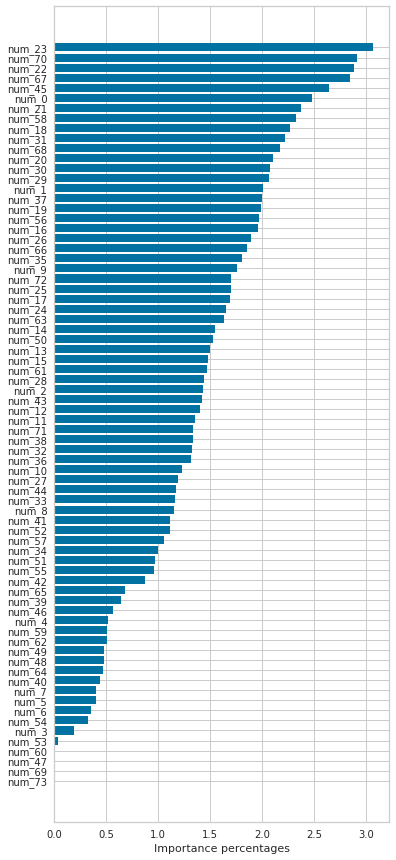

In [40]:
f, ax = plt.subplots(figsize=(6, 15))
feature_importances = (model_lgbm2.feature_importances_ / sum(model_lgbm2.feature_importances_)) * 100
results = pd.DataFrame({'Features': list_feature_names,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True)

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Importance percentages')
plt.show()
#########################################

In [41]:
df_feature_importance = (
    pd.DataFrame({
        'feature': list_feature_names,
        'importance': model_lgbm2.feature_importances_,
    })
    .sort_values('importance', ascending=False)
)
df_feature_importance

,feature,importance
23,num_23,4586
70,num_70,4356
22,num_22,4303
67,num_67,4249
45,num_45,3950
...,...,...
53,num_53,47
60,num_60,0
69,num_69,0
47,num_47,0


In [42]:
# best link : https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
#https://www.kaggle.com/dansbecker/shap-values

x_pre_df = pd.DataFrame(data=x_pre[0:500],columns=list_feature_names)
explainer = shap.TreeExplainer(model_lgbm2)
shap_values = explainer.shap_values(x_pre_df)
explainer.expected_value

[3.5714266645154362, -3.5714266645154362]

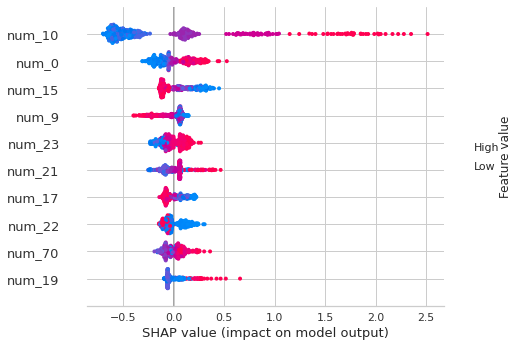

In [43]:
shap.summary_plot(shap_values [1],x_pre_df, max_display=10)

In [44]:
# Get the index of elements with value 1
result = np.where(y == 0)
fraudvalue=result[0][0]
x_pre_df.iloc[fraudvalue,:][0:2]

num_0    1.507306
num_1   -0.733651
Name: 1, dtype: float64

In [45]:
print("Test data (actual observation): {}".format(y[fraudvalue]))
preds=model_lgbm2.predict(x_pre[fraudvalue].reshape(1, -1))
print("Model's prediction: {}".format(preds))

Test data (actual observation): 0
Model's prediction: [0]


In [46]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values[1][fraudvalue,:], 
                x_pre_df.iloc[fraudvalue,:],link='logit'
)

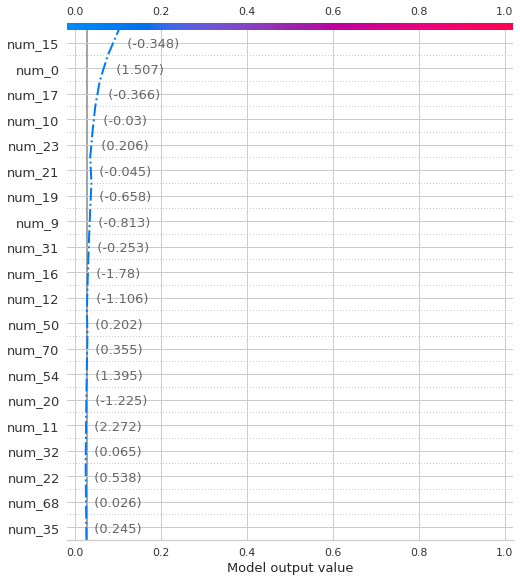

In [47]:
shap.decision_plot(explainer.expected_value[1]
                   , shap_values[1][fraudvalue,:], x_pre[fraudvalue],
                   link='logit', highlight=0,feature_names=list_feature_names)

The red features in the force plot drives our prediction to be 1 

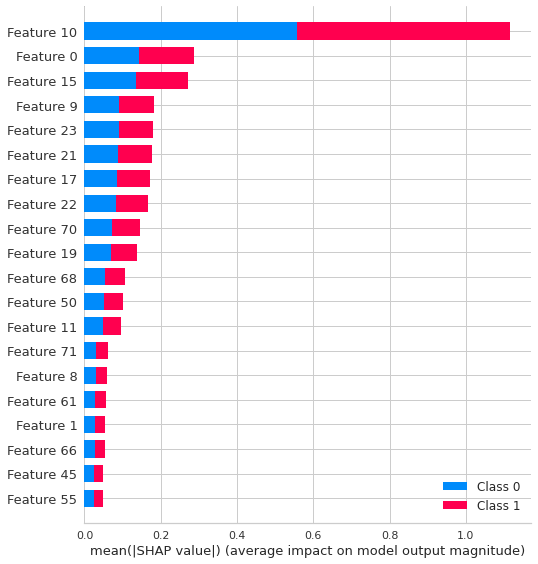

In [48]:
shap.summary_plot(shap_values, x_pre, plot_type='bar')

In [49]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
#ABS_SHAP(shap_values,x_pre[0:200])

# Final predictions

In [50]:
predictions = np.mean(np.column_stack(predictions), axis=1)

In [51]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('sclf1.csv', index=False)
sub

,Id,Probability
0,1,0.059357
1,2,0.043084
2,3,0.015515
3,4,0.064689
4,5,0.105483
...,...,...
101498,101499,0.030125
101499,101500,0.398874
101500,101501,0.010927
101501,101502,0.069618
